In [1]:
import numpy as np
import pandas as pd
import time
# Read data from the excel file and store it into a dataset
dataset = pd.read_csv('1.csv',usecols=[0])


In [2]:
tmp_dataset=dataset

time111=10
for i in range(1,time111+1):
    result=tmp_dataset.shift(periods=i)
    dataset=pd.concat([dataset,result],axis=1)

In [3]:
# Create the features (x) and target (y) data sets
train=dataset[time111:round((dataset.shape[0]-time111)*0.9)]
test=dataset[round((dataset.shape[0]-time111)*0.9):]

# import sklearn machine learning library
from sklearn.model_selection import train_test_split

# Split the features and target datasets into training and test datasets
X_train = train.iloc[:, : -1].values
y_train = train.iloc[:, -1].values

X_test = test.iloc[:, : -1].values
y_test = test.iloc[:, -1].values


In [5]:
X_test

array([[ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ..., 68.1, 66.3, 46. ],
       [ 0. ,  0. ,  0. , ..., 62.3, 68.1, 66.3],
       [ 0. ,  0. ,  0. , ..., 61.9, 62.3, 68.1]])

In [4]:
time1=time.time()
# Import the tensorflow machine learning library to create the ANN model
import tensorflow as tf

# Initialize the ANN model
ann = tf.keras.models.Sequential()

# Add dense layers to create an ANN model with an architecture of 4-6-6-1
ann.add(tf.keras.layers.Dense(units=1024, activation='relu'))
ann.add(tf.keras.layers.Dense(units=256, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation= 'relu'))

# Compile the ANN model using the adam optimizer and the mean squared error loss function
sgd=tf.keras.optimizers.Adam(learning_rate=1e-5)
ann.compile(optimizer=sgd, loss='mean_squared_error')

# Fit the training data into the ANN model, using epochs = 100
ann.fit(X_train, y_train, batch_size=64, epochs=300)

# Use the test data to make the prediction
y_pred = ann.predict(X_test)

# Set the precision to two decimal places
np.set_printoptions(precision=2)

new_y_test = y_test.reshape(len(y_test), 1)
#print(new_y_test)
#print(y_pred)

# Calculate the accuracy of the ANN model
model_acc = 100-((abs(y_pred - new_y_test)/new_y_test)*100)

print(model_acc)

print(np.average(model_acc))
time2=time.time()

Epoch 1/300
52/52 [==============================] - 0s 3ms/step - loss: 96.9405
Epoch 2/300
52/52 [==============================] - 0s 3ms/step - loss: 63.4155
Epoch 3/300
52/52 [==============================] - 0s 3ms/step - loss: 31.3003
Epoch 4/300
52/52 [==============================] - 0s 3ms/step - loss: 12.1300
Epoch 5/300
52/52 [==============================] - 0s 3ms/step - loss: 7.7575
Epoch 6/300
52/52 [==============================] - 0s 3ms/step - loss: 7.5116
Epoch 7/300
52/52 [==============================] - 0s 3ms/step - loss: 7.3932
Epoch 8/300
52/52 [==============================] - 0s 3ms/step - loss: 7.2796
Epoch 9/300
52/52 [==============================] - 0s 3ms/step - loss: 7.1420
Epoch 10/300
52/52 [==============================] - 0s 3ms/step - loss: 7.0241
Epoch 11/300
52/52 [==============================] - 0s 3ms/step - loss: 6.9065
Epoch 12/300
52/52 [==============================] - 0s 3ms/step - loss: 6.7972
Epoch 13/300
52/52 [=============

52/52 [==============================] - ETA: 0s - loss: 5.758 - 0s 2ms/step - loss: 5.7922
Epoch 103/300
52/52 [==============================] - 0s 2ms/step - loss: 5.7934
Epoch 104/300
52/52 [==============================] - 0s 2ms/step - loss: 5.7897
Epoch 105/300
52/52 [==============================] - 0s 2ms/step - loss: 5.8072
Epoch 106/300
52/52 [==============================] - 0s 2ms/step - loss: 5.7950
Epoch 107/300
52/52 [==============================] - 0s 2ms/step - loss: 5.8173
Epoch 108/300
52/52 [==============================] - 0s 2ms/step - loss: 5.8234
Epoch 109/300
52/52 [==============================] - 0s 2ms/step - loss: 5.7803
Epoch 110/300
52/52 [==============================] - 0s 2ms/step - loss: 5.7847
Epoch 111/300
52/52 [==============================] - 0s 2ms/step - loss: 5.7863
Epoch 112/300
52/52 [==============================] - 0s 2ms/step - loss: 5.8042
Epoch 113/300
52/52 [==============================] - 0s 2ms/step - loss: 5.7874
Epoch 

52/52 [==============================] - 0s 3ms/step - loss: 5.5825
Epoch 202/300
52/52 [==============================] - 0s 3ms/step - loss: 5.5701
Epoch 203/300
52/52 [==============================] - 0s 3ms/step - loss: 5.5538
Epoch 204/300
52/52 [==============================] - 0s 3ms/step - loss: 5.5511
Epoch 205/300
52/52 [==============================] - 0s 3ms/step - loss: 5.5659
Epoch 206/300
52/52 [==============================] - 0s 3ms/step - loss: 5.5410
Epoch 207/300
52/52 [==============================] - 0s 3ms/step - loss: 5.5361
Epoch 208/300
52/52 [==============================] - 0s 2ms/step - loss: 5.5773
Epoch 209/300
52/52 [==============================] - 0s 3ms/step - loss: 5.5412
Epoch 210/300
52/52 [==============================] - 0s 3ms/step - loss: 5.5534
Epoch 211/300
52/52 [==============================] - 0s 3ms/step - loss: 5.5331
Epoch 212/300
52/52 [==============================] - 0s 3ms/step - loss: 5.5999
Epoch 213/300
52/52 [=========

In [5]:
print(time2-time1)

42.99997138977051


In [9]:
import matplotlib.pyplot as plt
xx=[]
for i in range(round(y_pred.shape[0]/10)):
    xx.append(i)


In [7]:
print(y_test)
data={'y_test':y_test}
frame=pd.DataFrame(data)
frame.to_csv('tmp_ann.csv')

[12.6 10.4 12.2 12.6 12.1 17.3 16.4 12.6 12.3 11.8 12.  12.7 16.4 16.
 13.3 11.7 10.4 14.4 12.7 14.8 13.3 15.6 14.5 14.3 15.3 16.4 14.8 17.4
 18.8 22.1 19.  15.5 15.8 14.7 10.7 11.5 15.  14.5 14.5 13.3 14.3 14.3
 20.5 15.  17.1 16.9 16.9 13.6 16.4 16.1 12.  12.2 14.8 14.8 14.4 12.9
 13.4 15.9 16.1 17.6 15.6 15.  13.  14.1 17.3 15.7 18.6 12.7 14.  13.7
 16.3 20.  17.  15.2 16.5 16.5 17.3 19.1 19.3 17.3 19.  19.8 19.3 17.2
 14.2 10.3 13.  15.3 15.  12.1  9.2 11.  15.  11.6 11.6 15.1 15.  13.6
 12.5 14.3 16.  17.4 16.9 18.  20.6 14.2 10.9 11.9 13.3 15.3 14.7 11.
 12.2 14.2 17.  15.8 15.2 15.1 14.7 18.5 16.4 18.4 15.1  9.9 10.2 12.6
 13.2 11.5 13.8 14.5 14.7 11.2 12.7 13.7 11.5 10.4  8.9 11.1  9.5 13.
 13.9 12.6 14.3 16.  13.3  7.   4.9  6.9 13.7 10.6 12.3 11.1 10.2  9.5
  8.9 13.4  9.1  9.4  8.7  5.8  4.5  7.2 10.  10.5 10.7  8.2  6.1  4.5
  6.1  9.8  9.7  8.2  8.4  8.5 10.4  6.8  6.   6.6  7.8 10.3  7.2  7.4
 11.4  5.4  4.4  6.4  9.3  7.7  8.1  8.3  9.1  7.7 10.6  8.2  7.9  5.2
  5.9  3.

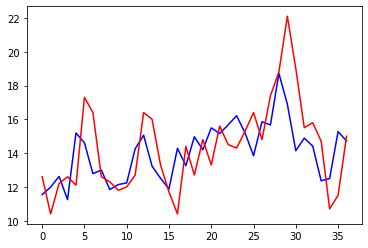

In [10]:
plt.plot(xx, y_pred[:len(xx)],c='b')
plt.plot(xx, y_test[:len(xx)],c='r')

In [11]:
from sklearn import metrics

print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))


5.226658475046646
1.784842590597224
0.6440168632578791
